<a href="https://colab.research.google.com/github/KashmalaSiddiqui/210FinalProject/blob/main/210Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip to instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip


In [2]:
import zipfile
import os

# Specify the name of your uploaded zip file
zip_file_name = "instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("extracted_data")

# List the extracted files
print("Extracted files:", os.listdir("extracted_data"))

# Later from this, just keep te your_instagram_activity, ads_information and delete the rest
#then we work with the instagram activity

Extracted files: ['ads_information', 'preferences', 'apps_and_websites_off_of_instagram', 'personal_information', 'security_and_login_information', 'logged_information', 'your_instagram_activity', 'connections', 'media']


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.4 MB/s eta 0:00:00


## AD info


Start Year: 2024
End Year: 2024
Years of Data: 1 years

Top 10 Authors with Most Viewed Posts:
author
dawn.today               129
aljazeeraenglish          37
mindset.therapy           36
thishowthingswork         26
dawn_images               13
indian.standup            12
ashisportfolio            11
entertainmenttonight       7
opportunitiesforyouth      7
theeconomist               6
Name: count, dtype: int64


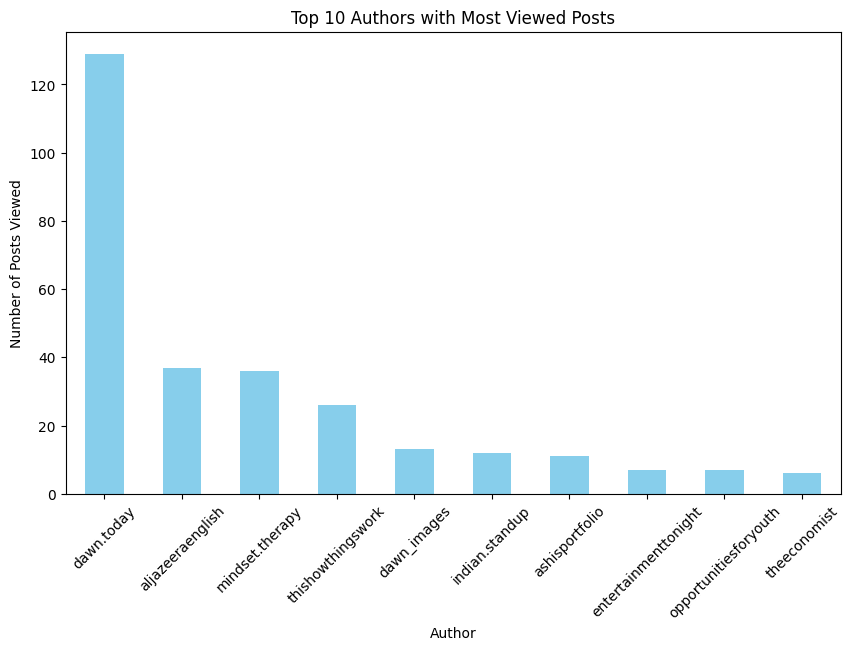

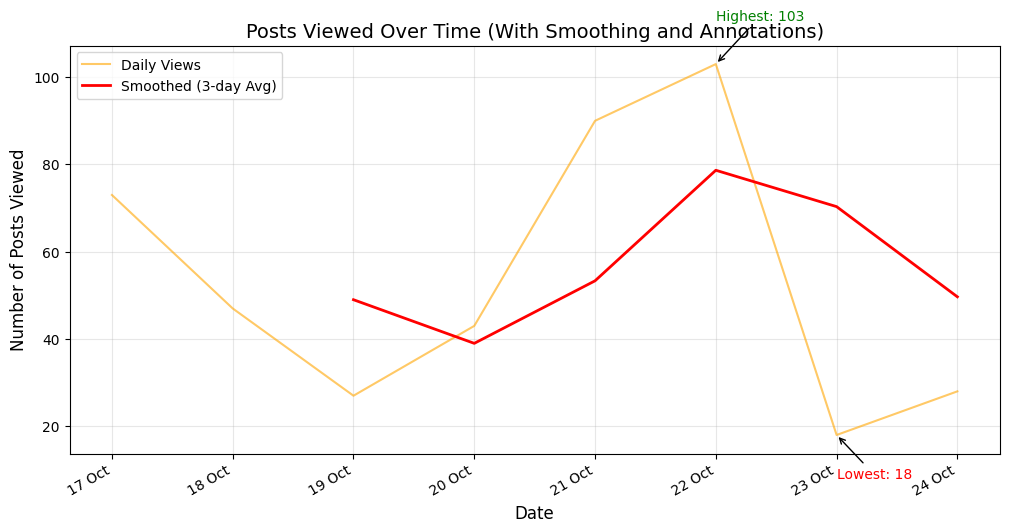

In [7]:
#Merged
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Specify the file path for 'posts_viewed.json'
file_path = "/content/extracted_data/ads_information/ads_and_topics/posts_viewed.json"

# Load the JSON file and convert to DataFrame
with open(file_path, 'r', encoding='utf-8') as f:
    posts_viewed_data = json.load(f)

if 'impressions_history_posts_seen' in posts_viewed_data:
    posts_viewed_list = posts_viewed_data['impressions_history_posts_seen']
    df_posts_viewed = pd.json_normalize(posts_viewed_list, sep='.')
else:
    print("No 'impressions_history_posts_seen' data found in the JSON file.")
    exit()

# Extract relevant fields
df_posts_viewed['author'] = df_posts_viewed['string_map_data.Author.value']
df_posts_viewed['timestamp'] = pd.to_datetime(df_posts_viewed['string_map_data.Time.timestamp'], unit='s')

# Determine the time range of data
start_year = df_posts_viewed['timestamp'].min().year
end_year = df_posts_viewed['timestamp'].max().year
years_of_data = end_year - start_year + 1

# Display results
print(f"Start Year: {start_year}")
print(f"End Year: {end_year}")
print(f"Years of Data: {years_of_data} years")

# Top 10 Most Viewed Authors
author_counts = df_posts_viewed['author'].value_counts()
print("\nTop 10 Authors with Most Viewed Posts:")
print(author_counts.head(10))

# Plot Most Viewed Authors
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors with Most Viewed Posts")
plt.xlabel("Author")
plt.ylabel("Number of Posts Viewed")
plt.xticks(rotation=45)
plt.show()

# Group data by date and count posts viewed
posts_per_day = df_posts_viewed.set_index('timestamp').resample('D')['author'].count()

# Smooth the curve using a rolling average
posts_per_day_smoothed = posts_per_day.rolling(window=3).mean()

# Plot Posts Viewed Over Time with Enhancements
plt.figure(figsize=(12, 6))
plt.plot(posts_per_day.index, posts_per_day, color='orange', alpha=0.6, label='Daily Views')
plt.plot(posts_per_day.index, posts_per_day_smoothed, color='red', label='Smoothed (3-day Avg)', linewidth=2)

# Annotate highest and lowest points
max_day = posts_per_day.idxmax()
min_day = posts_per_day.idxmin()
plt.annotate(f"Highest: {posts_per_day.max()}", xy=(max_day, posts_per_day.max()), xytext=(max_day, posts_per_day.max() + 10),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')
plt.annotate(f"Lowest: {posts_per_day.min()}", xy=(min_day, posts_per_day.min()), xytext=(min_day, posts_per_day.min() - 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')

# Enhance x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add title and labels
plt.title("Posts Viewed Over Time (With Smoothing and Annotations)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Posts Viewed", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



Columns in the dataset:
Index(['string_map_data.Author.value', 'string_map_data.Time.timestamp'], dtype='object')

Sample Data:
  string_map_data.Author.value  string_map_data.Time.timestamp
0                   dawn.today                      1729166359
1         entertainmenttonight                      1729168077
2                   dawn.today                      1729168080
3               hindustantimes                      1729168166
4                   dawn.today                      1729168209

Extracted Data:
                 author           timestamp
0            dawn.today 2024-10-17 11:59:19
1  entertainmenttonight 2024-10-17 12:27:57
2            dawn.today 2024-10-17 12:28:00
3        hindustantimes 2024-10-17 12:29:26
4            dawn.today 2024-10-17 12:30:09

Top 10 Authors with Most Viewed Posts:
author
dawn.today               129
aljazeeraenglish          37
mindset.therapy           36
thishowthingswork         26
dawn_images               13
indian.standup      

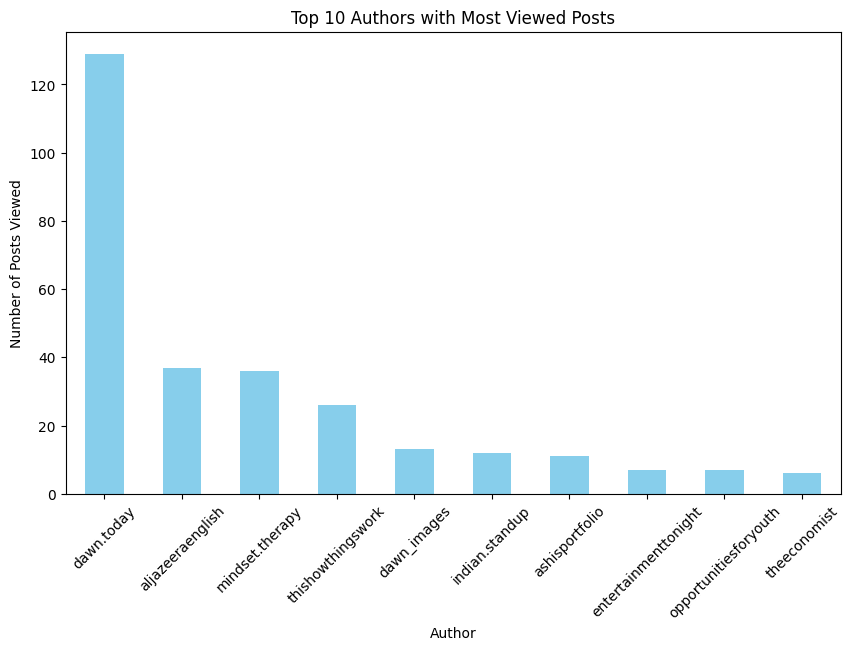

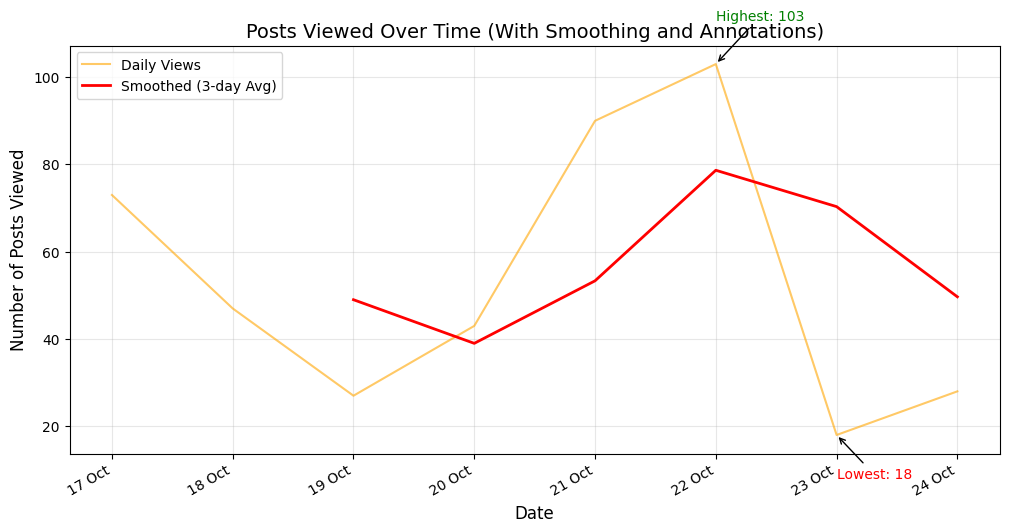

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Specify the file path for 'posts_viewed.json'
file_path = "/content/extracted_data/ads_information/ads_and_topics/posts_viewed.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    posts_viewed_data = json.load(f)

# Convert JSON to a DataFrame
if 'impressions_history_posts_seen' in posts_viewed_data:
    posts_viewed_list = posts_viewed_data['impressions_history_posts_seen']
    df_posts_viewed = pd.json_normalize(posts_viewed_list, sep='.')
else:
    print("No 'impressions_history_posts_seen' data found in the JSON file.")
    exit()

# Inspect the DataFrame
print("\nColumns in the dataset:")
print(df_posts_viewed.columns)

print("\nSample Data:")
print(df_posts_viewed.head())

# Extract relevant fields
df_posts_viewed['author'] = df_posts_viewed['string_map_data.Author.value']
df_posts_viewed['timestamp'] = pd.to_datetime(df_posts_viewed['string_map_data.Time.timestamp'], unit='s')

# Inspect the extracted data
print("\nExtracted Data:")
print(df_posts_viewed[['author', 'timestamp']].head())

# Most Viewed Authors
author_counts = df_posts_viewed['author'].value_counts()
print("\nTop 10 Authors with Most Viewed Posts:")
print(author_counts.head(10))

# Plot Most Viewed Authors
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors with Most Viewed Posts")
plt.xlabel("Author")
plt.ylabel("Number of Posts Viewed")
plt.xticks(rotation=45)
plt.show()

# Group data by date and count the number of posts viewed
posts_per_day = df_posts_viewed.set_index('timestamp').resample('D')['author'].count()

# Smooth the curve using a rolling average
posts_per_day_smoothed = posts_per_day.rolling(window=3).mean()

# Plot Posts Viewed Over Time with Enhancements
plt.figure(figsize=(12, 6))
plt.plot(posts_per_day.index, posts_per_day, color='orange', alpha=0.6, label='Daily Views')
plt.plot(posts_per_day.index, posts_per_day_smoothed, color='red', label='Smoothed (3-day Avg)', linewidth=2)

# Annotate the highest and lowest points
max_day = posts_per_day.idxmax()
min_day = posts_per_day.idxmin()
plt.annotate(f"Highest: {posts_per_day.max()}", xy=(max_day, posts_per_day.max()), xytext=(max_day, posts_per_day.max() + 10),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')
plt.annotate(f"Lowest: {posts_per_day.min()}", xy=(min_day, posts_per_day.min()), xytext=(min_day, posts_per_day.min() - 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')

# Enhance x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add title and labels
plt.title("Posts Viewed Over Time (With Smoothing and Annotations)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Posts Viewed", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [6]:
import json
import pandas as pd

# Specify the file path for 'posts_viewed.json'
file_path = "/content/extracted_data/ads_information/ads_and_topics/posts_viewed.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    posts_viewed_data = json.load(f)

# Convert JSON to a DataFrame
if 'impressions_history_posts_seen' in posts_viewed_data:
    posts_viewed_list = posts_viewed_data['impressions_history_posts_seen']
    df_posts_viewed = pd.json_normalize(posts_viewed_list, sep='.')
else:
    print("No 'impressions_history_posts_seen' data found in the JSON file.")
    exit()

# Extract the timestamp and convert it to datetime
df_posts_viewed['timestamp'] = pd.to_datetime(df_posts_viewed['string_map_data.Time.timestamp'], unit='s')

# Get the start and end year
start_year = df_posts_viewed['timestamp'].min().year
end_year = df_posts_viewed['timestamp'].max().year

# Calculate the number of years
years_of_data = end_year - start_year + 1  # Add 1 to include both start and end years

# Display the result
print(f"Start Year: {start_year}")
print(f"End Year: {end_year}")
print(f"Years of Data: {years_of_data} years")


Start Year: 2024
End Year: 2024
Years of Data: 1 years



Columns in the dataset:
Index(['string_map_data.Author.value', 'string_map_data.Time.timestamp',
       'author', 'timestamp'],
      dtype='object')

Sample Data:
              author           timestamp
0  organic_traveller 2024-10-17 11:59:19
1     indian.standup 2024-10-17 12:27:13
2      kanakskitchen 2024-10-17 12:29:14
3   aljazeeraenglish 2024-10-17 12:29:18
4   esim.voye.global 2024-10-17 12:30:06

Top 10 Authors with Most Watched Videos:
author
mindset.therapy      16
indian.standup       16
aljazeeraenglish     12
vuroona              12
omaragamyy           10
doctorsoood          10
saniyafarrukh_        8
dawn.today            8
organic_traveller     8
filmygyan             7
Name: count, dtype: int64


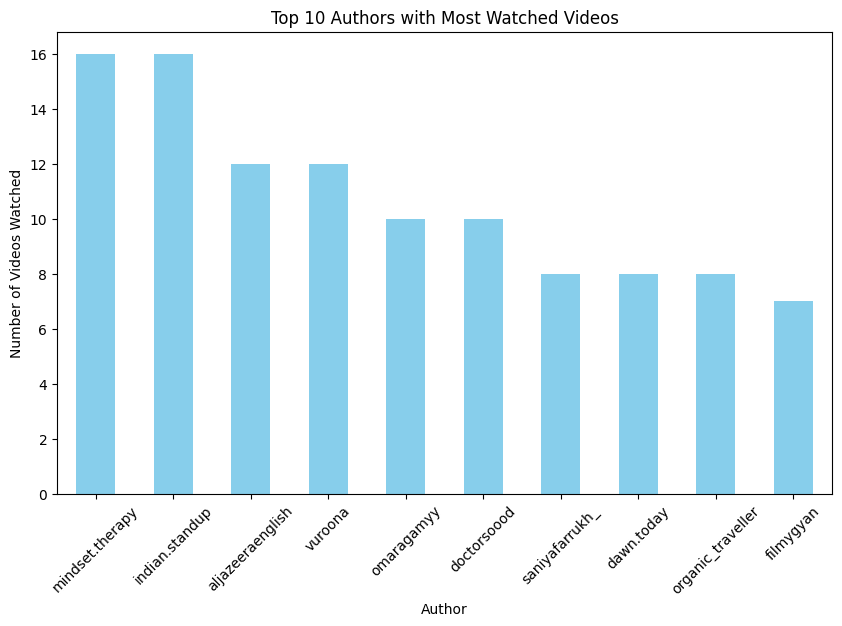

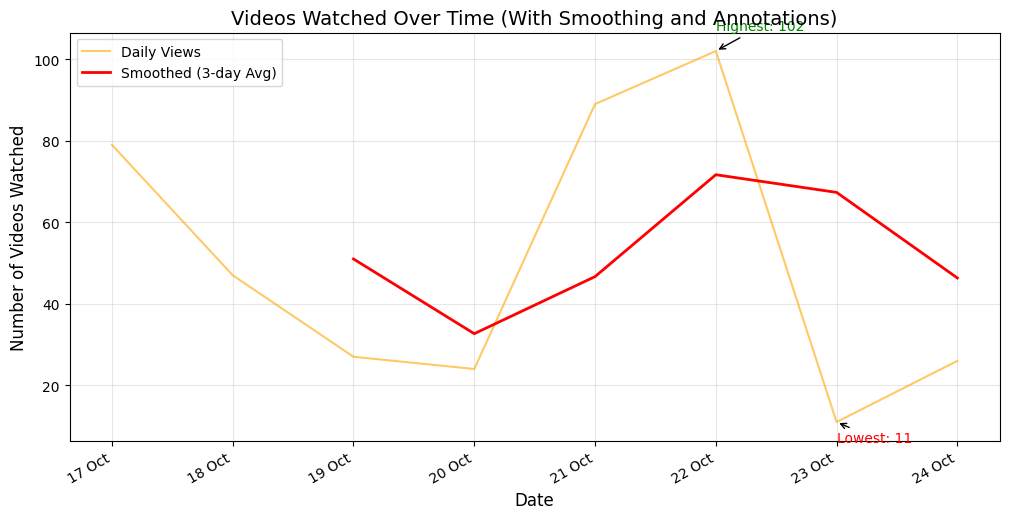


Start Year: 2024
End Year: 2024
Years of Data: 1 years


In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Specify the file path for 'videos_watched.json'
file_path = "/content/extracted_data/ads_information/ads_and_topics/videos_watched.json"

# Load the JSON file and convert to DataFrame
with open(file_path, 'r', encoding='utf-8') as f:
    videos_watched_data = json.load(f)

if 'impressions_history_videos_watched' in videos_watched_data:
    videos_watched_list = videos_watched_data['impressions_history_videos_watched']
    df_videos_watched = pd.json_normalize(videos_watched_list, sep='.')
else:
    print("No 'impressions_history_videos_watched' data found in the JSON file.")
    exit()

# Extract relevant fields
df_videos_watched['author'] = df_videos_watched['string_map_data.Author.value']
df_videos_watched['timestamp'] = pd.to_datetime(df_videos_watched['string_map_data.Time.timestamp'], unit='s')

# Inspect the data
print("\nColumns in the dataset:")
print(df_videos_watched.columns)

print("\nSample Data:")
print(df_videos_watched[['author', 'timestamp']].head())

# 1. Most Watched Authors
author_counts = df_videos_watched['author'].value_counts()
print("\nTop 10 Authors with Most Watched Videos:")
print(author_counts.head(10))

# Plot Most Watched Authors
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors with Most Watched Videos")
plt.xlabel("Author")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=45)
plt.show()

# 2. Timeline Analysis: Videos Watched Over Time
videos_per_day = df_videos_watched.set_index('timestamp').resample('D')['author'].count()

# Smooth the curve using a rolling average
videos_per_day_smoothed = videos_per_day.rolling(window=3).mean()

# Plot Videos Watched Over Time
plt.figure(figsize=(12, 6))
plt.plot(videos_per_day.index, videos_per_day, color='orange', alpha=0.6, label='Daily Views')
plt.plot(videos_per_day.index, videos_per_day_smoothed, color='red', label='Smoothed (3-day Avg)', linewidth=2)

# Annotate highest and lowest points
max_day = videos_per_day.idxmax()
min_day = videos_per_day.idxmin()
plt.annotate(f"Highest: {videos_per_day.max()}", xy=(max_day, videos_per_day.max()), xytext=(max_day, videos_per_day.max() + 5),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')
plt.annotate(f"Lowest: {videos_per_day.min()}", xy=(min_day, videos_per_day.min()), xytext=(min_day, videos_per_day.min() - 5),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')

# Enhance x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add title and labels
plt.title("Videos Watched Over Time (With Smoothing and Annotations)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Videos Watched", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3. Time Range Analysis
start_year = df_videos_watched['timestamp'].min().year
end_year = df_videos_watched['timestamp'].max().year
years_of_data = end_year - start_year + 1

print(f"\nStart Year: {start_year}")
print(f"End Year: {end_year}")
print(f"Years of Data: {years_of_data} years")


## **Comments parsing**

In [ ]:
#Old
import json
import pandas as pd

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/comments/post_comments_1.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)

# Function to fix double UTF-8 encoded strings
def fix_double_encoding(text):
    try:
        # Decode as bytes, then re-encode as UTF-8
        return bytes(text, "utf-8").decode("utf-8").encode("latin1").decode("utf-8")
    except:
        return text  # Return original text if decoding fails

# Fix the 'Comment.value' column
if 'string_map_data.Comment.value' in df_comments.columns:
    df_comments['string_map_data.Comment.value'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: fix_double_encoding(x) if isinstance(x, str) else x
    )

# Display the cleaned DataFrame
print("Cleaned Comments with Proper Decoding:")
print(df_comments[['string_map_data.Comment.value']].head())

# Optional: Extract emojis using emoji library
try:
    import emoji
    df_comments['emojis'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: ''.join(c for c in x if c in emoji.EMOJI_DATA) if isinstance(x, str) else ''
    )
    print("\nComments with extracted emojis:")
    print(df_comments[['string_map_data.Comment.value', 'emojis']].head())
except ImportError:
    print("\nInstall the 'emoji' library for emoji extraction: pip install emoji")


Cleaned Comments with Proper Decoding:
  string_map_data.Comment.value
0                So pretty ❤️❤️
1                          ❤️❤️
2                          ❤️❤️
3                          ❤️❤️
4                Kya talent hai

Comments with extracted emojis:
  string_map_data.Comment.value emojis
0                So pretty ❤️❤️     ❤❤
1                          ❤️❤️     ❤❤
2                          ❤️❤️     ❤❤
3                          ❤️❤️     ❤❤
4                Kya talent hai       


Total number of comments: 15
Columns in the dataset: Index(['media_list_data', 'string_map_data.Comment.value',
       'string_map_data.Media Owner.value', 'string_map_data.Time.timestamp'],
      dtype='object')

Sample Data:
  media_list_data string_map_data.Comment.value  \
0   [{'uri': ''}]        So pretty â¤ï¸â¤ï¸   
1   [{'uri': ''}]                  â¤ï¸â¤ï¸   
2   [{'uri': ''}]                  â¤ï¸â¤ï¸   
3   [{'uri': ''}]                  â¤ï¸â¤ï¸   
4   [{'uri': ''}]                Kya talent hai   

  string_map_data.Media Owner.value  string_map_data.Time.timestamp  
0                    itisjustmaryam                      1726416650  
1                    itisjustmaryam                      1725975157  
2                   areebah.shakeel                      1723142603  
3                      cheers2abeer                      1718046128  
4                      cheers2abeer                      1718041961  

Top 10 Most Common Words:
[('❤️❤️', 5), ('❤️❤

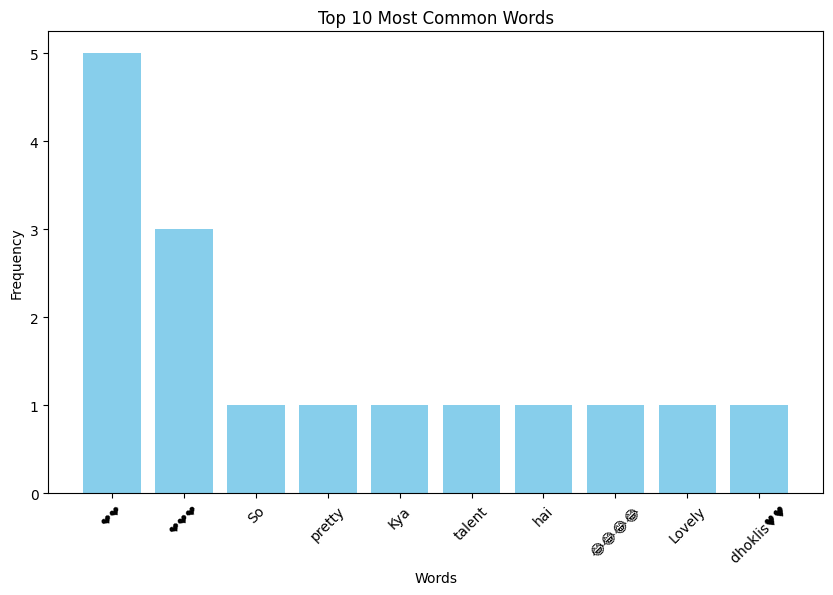

In [16]:
#new
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import emoji
from textblob import TextBlob  # For sentiment analysis

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/comments/post_comments_1.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)

# Count the number of comments
num_comments = df_comments.shape[0]
print(f"Total number of comments: {num_comments}")

# (a) Inspect the Data Structure
print("Columns in the dataset:", df_comments.columns)
print("\nSample Data:")
print(df_comments.head())

# Function to fix double UTF-8 encoded strings
def fix_double_encoding(text):
    try:
        # Decode as bytes, then re-encode as UTF-8
        return bytes(text, "utf-8").decode("utf-8").encode("latin1").decode("utf-8")
    except:
        return text  # Return original text if decoding fails

# Fix the 'Comment.value' column
if 'string_map_data.Comment.value' in df_comments.columns:
    df_comments['string_map_data.Comment.value'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: fix_double_encoding(x) if isinstance(x, str) else x
    )

# (b1) Word Frequency Analysis
if 'string_map_data.Comment.value' in df_comments.columns:
    # Combine all comments into a single string
    all_comments = ' '.join(df_comments['string_map_data.Comment.value'].dropna())

    # Tokenize the words
    words = all_comments.split()

    # Count word frequency
    word_count = Counter(words)

    # Display the most common words
    print("\nTop 10 Most Common Words:")
    print(word_count.most_common(10))

    # Plot word frequency
    most_common_words = word_count.most_common(10)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top 10 Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()




Emoji Analysis


Top 10 Most Used Emojis:
[('❤', 24), ('😂', 4), ('♥', 2)]


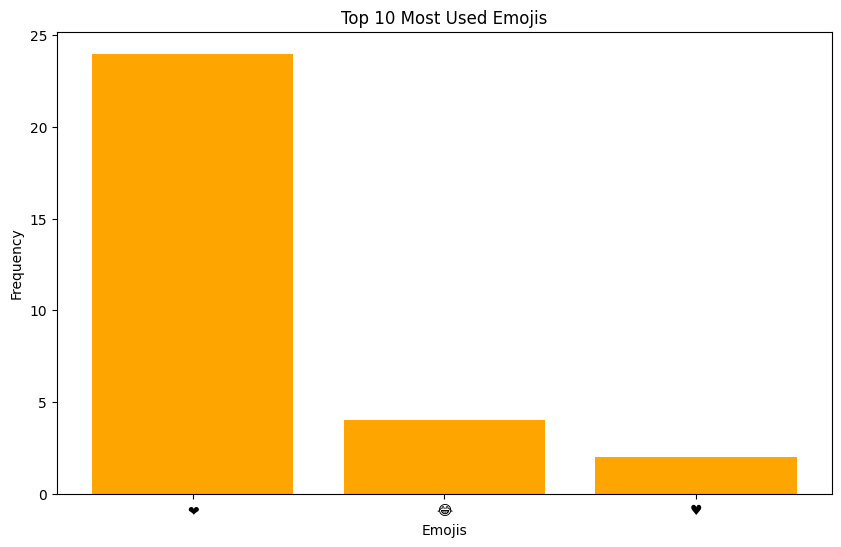

In [10]:
# (b2) Emoji Usage Analysis
df_comments['emojis'] = df_comments['string_map_data.Comment.value'].apply(
    lambda x: ''.join(c for c in x if c in emoji.EMOJI_DATA) if isinstance(x, str) else ''
)

# Combine all emojis
all_emojis = ''.join(df_comments['emojis'].dropna())

# Count emoji frequency
emoji_count = Counter(all_emojis)

# Display the most common emojis
print("\nTop 10 Most Used Emojis:")
print(emoji_count.most_common(10))

# Plot emoji usage
most_common_emojis = emoji_count.most_common(10)
emojis, counts = zip(*most_common_emojis)

plt.figure(figsize=(10, 6))
plt.bar(emojis, counts, color='orange')
plt.title("Top 10 Most Used Emojis")
plt.xlabel("Emojis")
plt.ylabel("Frequency")
plt.show()

Check who is the person, who's post I commented on the most


Top 5 People Whose Posts You Commented On:
string_map_data.Media Owner.value
cheers2abeer       6
itisjustmaryam     2
abeersaqib20       2
ahmadkhann44       2
areebah.shakeel    1
Name: count, dtype: int64


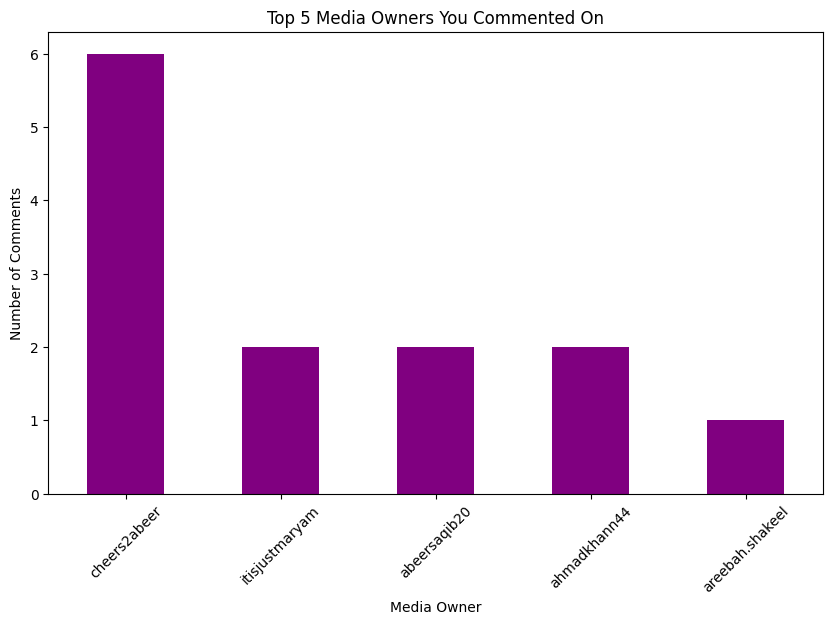

In [11]:
# (c) Most Commented Person's Posts
if 'string_map_data.Media Owner.value' in df_comments.columns:
    # Count comments per media owner
    media_owner_counts = df_comments['string_map_data.Media Owner.value'].value_counts()

    # Display the top media owners
    print("\nTop 5 People Whose Posts You Commented On:")
    print(media_owner_counts.head())

    # Plot the top media owners
    plt.figure(figsize=(10, 6))
    media_owner_counts.head(5).plot(kind='bar', color='purple')
    plt.title("Top 5 Media Owners You Commented On")
    plt.xlabel("Media Owner")
    plt.ylabel("Number of Comments")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Media Owner data is not available in the dataset.")


Sentiment Analysis of the words that I commented


Sentiment Distribution:
sentiment_category
Neutral     12
Positive     3
Name: count, dtype: int64


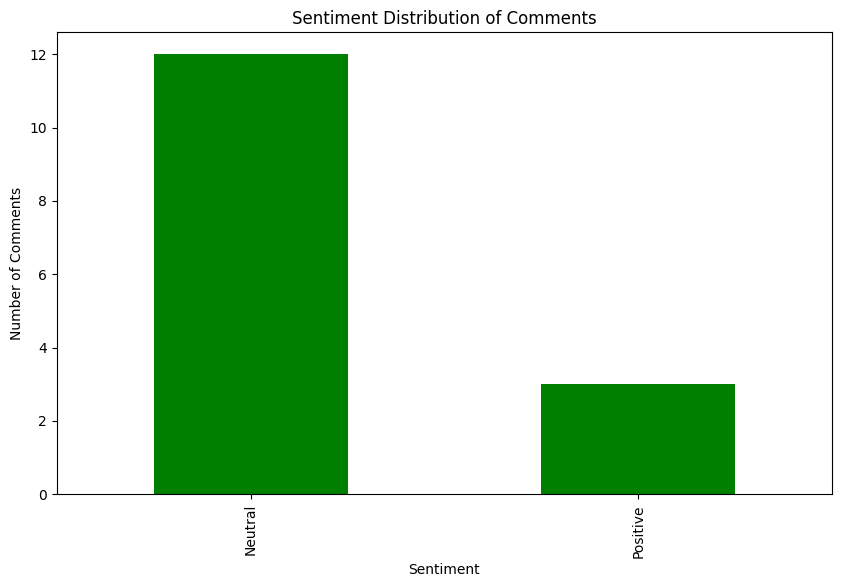

In [12]:
# (d) Sentiment Analysis
if 'string_map_data.Comment.value' in df_comments.columns:
    # Perform sentiment analysis
    df_comments['sentiment'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else None
    )

    # Categorize sentiment
    df_comments['sentiment_category'] = df_comments['sentiment'].apply(
        lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
    )

    # Display sentiment distribution
    sentiment_counts = df_comments['sentiment_category'].value_counts()
    print("\nSentiment Distribution:")
    print(sentiment_counts)

    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar', color='green')
    plt.title("Sentiment Distribution of Comments")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Comments")
    plt.show()

## LIKES


Columns in the Likes dataset:
Index(['likes_media_likes'], dtype='object')

Sample Data:
                                   likes_media_likes
0  [{'title': 'asjadwaqar20', 'string_list_data':...

Shape of the dataset: (1, 1)

Type of data in 'likes_media_likes': <class 'list'>

Normalized Likes Data:
                    title                                   string_list_data
0            asjadwaqar20  [{'href': 'https://www.instagram.com/reel/DBZQ...
1               wardxhhhh  [{'href': 'https://www.instagram.com/p/DBX0anQ...
2               atifaslam  [{'href': 'https://www.instagram.com/p/DBJo9xT...
3  theprecision.institute  [{'href': 'https://www.instagram.com/p/DBJN8xG...
4  theprecision.institute  [{'href': 'https://www.instagram.com/p/DBJLj9O...

Categorized Post Types:
                                          href post_type
0  https://www.instagram.com/reel/DBZQTSwNpaK/      Reel
1     https://www.instagram.com/p/DBX0anQRla2/      Post
2     https://www.instagram.com/p/DBJo9

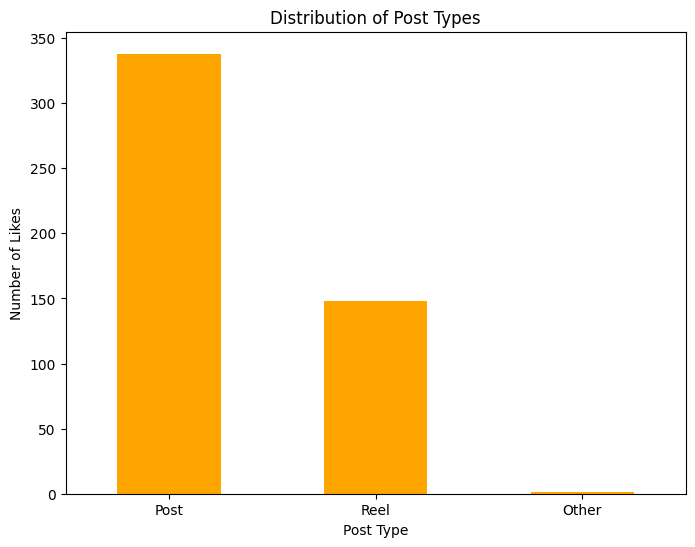


Most Liked Person's Posts:
title
ahmadkhann44              23
haadia.safdar             14
ezgituncal                14
cheers2abeer              12
theprecision.institute     9
                          ..
nyla.pakistan              1
bbrightvc                  1
theamidalasenate           1
laraibasif_kh              1
waliyanajib                1
Name: count, Length: 266, dtype: int64


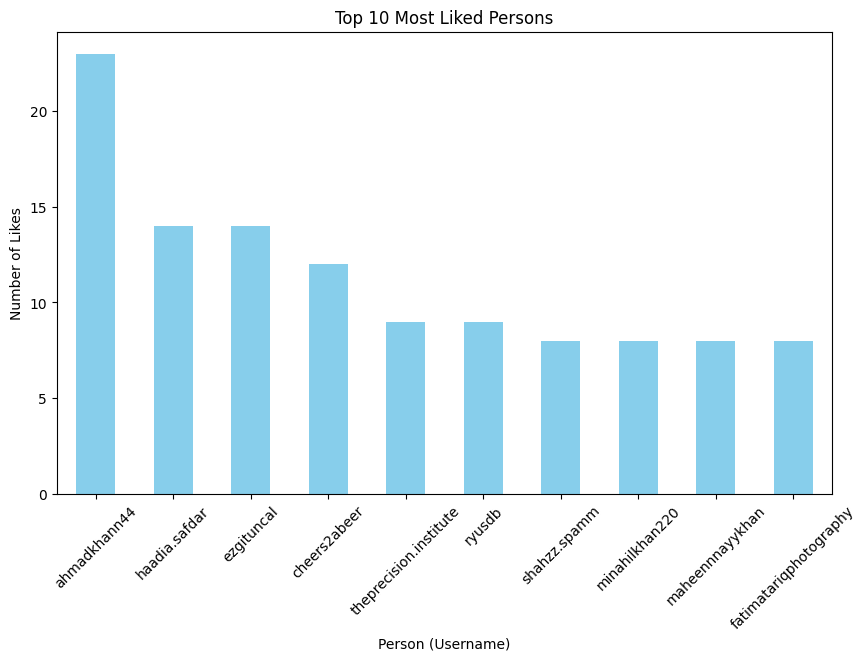

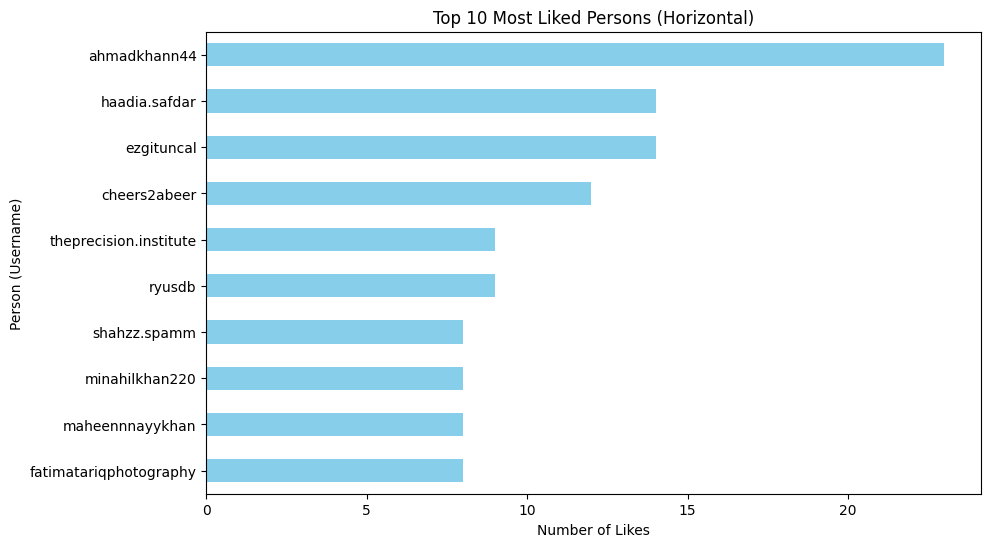

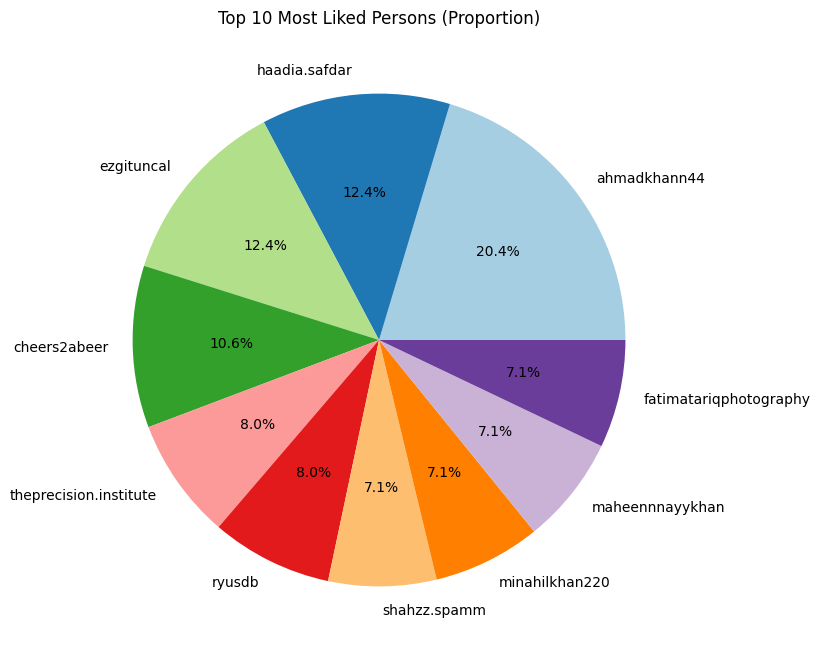

<Figure size 1000x600 with 0 Axes>

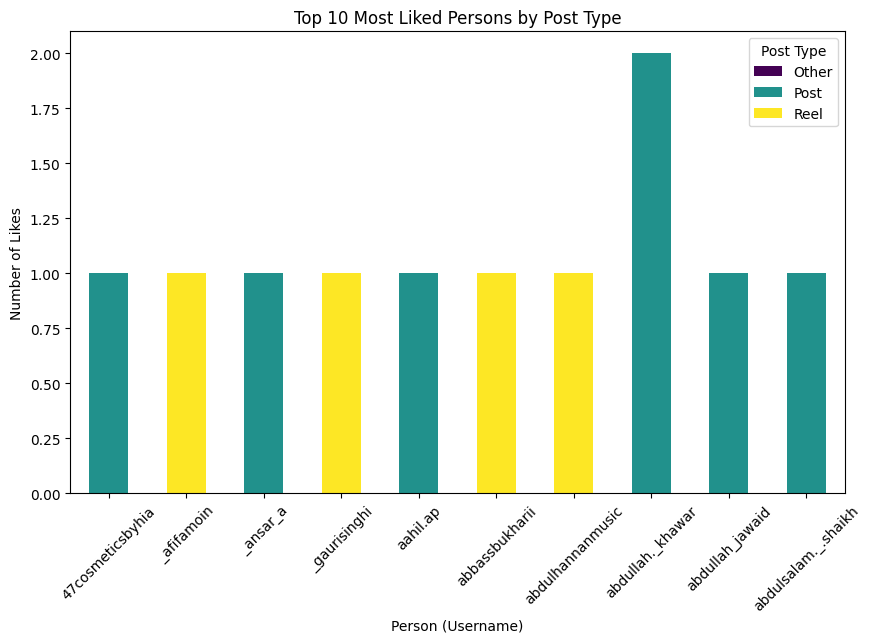

In [24]:
# For Likes Data
import json
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/likes/liked_posts.json"

# Load the JSON file
with open(file_path, 'r') as f:
    likes_data = json.load(f)

# Convert JSON to a DataFrame
df_likes = pd.json_normalize(likes_data)

# Inspect the columns and data structure
print("\nColumns in the Likes dataset:")
print(df_likes.columns)

print("\nSample Data:")
print(df_likes.head())

# Check the number of rows and columns
print(f"\nShape of the dataset: {df_likes.shape}")

# Extract and normalize the nested data
if 'likes_media_likes' in df_likes.columns:
    # Extract the nested data
    likes_raw_data = df_likes['likes_media_likes'][0]  # Extract the first (and only) row

    # Check the type of the data
    print("\nType of data in 'likes_media_likes':", type(likes_raw_data))

    # If it's a list of dictionaries, normalize it
    if isinstance(likes_raw_data, list):
        df_likes_normalized = pd.json_normalize(likes_raw_data)  # Flatten the list of dictionaries
        print("\nNormalized Likes Data:")
        print(df_likes_normalized.head())
    elif isinstance(likes_raw_data, dict):
        # If it's a single dictionary, convert it to a DataFrame
        df_likes_normalized = pd.DataFrame([likes_raw_data])
        print("\nNormalized Likes Data:")
        print(df_likes_normalized.head())
    else:
        print("Unexpected data structure!")
else:
    print("'likes_media_likes' column not found in the dataset!")

# Categorize Post Types
if 'string_list_data' in df_likes_normalized.columns:
    # Extract the href (URL) from the nested dictionary in string_list_data
    df_likes_normalized['href'] = df_likes_normalized['string_list_data'].apply(
        lambda x: x[0]['href'] if isinstance(x, list) and 'href' in x[0] else None
    )

    # Categorize post types based on href patterns
    df_likes_normalized['post_type'] = df_likes_normalized['href'].apply(
        lambda x: 'Reel' if '/reel/' in x else 'Post' if '/p/' in x else 'Story' if '/stories/' in x else 'Other'
    )

    # Display the categorized data
    print("\nCategorized Post Types:")
    print(df_likes_normalized[['href', 'post_type']].head())

    # Frequency Analysis by Post Type
    post_type_counts = df_likes_normalized['post_type'].value_counts()
    print("\nPost Type Counts:")
    print(post_type_counts)

    # Plot the distribution of post types
    plt.figure(figsize=(8, 6))
    post_type_counts.plot(kind='bar', color='orange')
    plt.title("Distribution of Post Types")
    plt.xlabel("Post Type")
    plt.ylabel("Number of Likes")
    plt.xticks(rotation=0)
    plt.show()

else:
    print("The 'string_list_data' column is not found in the dataset!")

# Frequency Analysis - Most Liked Person
if 'title' in df_likes_normalized.columns:  # Use the 'title' column for the post owner
    print("\nMost Liked Person's Posts:")
    person_counts = df_likes_normalized['title'].value_counts()  # Count frequency of each person
    print(person_counts)

    # Plot the top 10 most liked persons
    top_person_counts = person_counts.head(10)  # Select top 10 persons
    plt.figure(figsize=(10, 6))
    top_person_counts.plot(kind='bar', color='skyblue')
    plt.title("Top 10 Most Liked Persons")
    plt.xlabel("Person (Username)")
    plt.ylabel("Number of Likes")
    plt.xticks(rotation=45)
    plt.show()

    # Plot the top 10 most liked persons as a horizontal bar chart
    plt.figure(figsize=(10, 6))
    top_person_counts.plot(kind='barh', color='skyblue')
    plt.title("Top 10 Most Liked Persons (Horizontal)")
    plt.xlabel("Number of Likes")
    plt.ylabel("Person (Username)")
    plt.gca().invert_yaxis()  # Invert the Y-axis for better readability
    plt.show()

    # Plot the top 10 as a pie chart
    plt.figure(figsize=(8, 8))
    top_person_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title("Top 10 Most Liked Persons (Proportion)")
    plt.ylabel("")  # Remove the y-axis label for cleaner visualization
    plt.show()

    # Combine Post Type with Top Liked Persons
    plt.figure(figsize=(10, 6))
    pd.crosstab(df_likes_normalized['title'], df_likes_normalized['post_type']).head(10).plot(
        kind='bar', stacked=True, figsize=(10, 6), colormap="viridis"
    )
    plt.title("Top 10 Most Liked Persons by Post Type")
    plt.xlabel("Person (Username)")
    plt.ylabel("Number of Likes")
    plt.xticks(rotation=45)
    plt.legend(title="Post Type")
    plt.show()
else:
    print("The 'title' column is not found in the dataset!")


# Saved Posts

In [ ]:
#for my saved post
import json
import pandas as pd
import os

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/saved/saved_posts.json"

# Load the JSON file
with open(file_path, 'r') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)  # Normalizes nested JSON
print(df_comments.head())
